### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import time
import random

In [2]:
sns.set_theme()

### Load data

In [3]:
data = datasets.load_iris()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### DataFrame preparation

In [10]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [11]:
df["target"] = data["target"]
df["target_name"] = df["target"].map(dict(zip(range(0, len(data["target_names"])), data["target_names"])))

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data visualization

In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


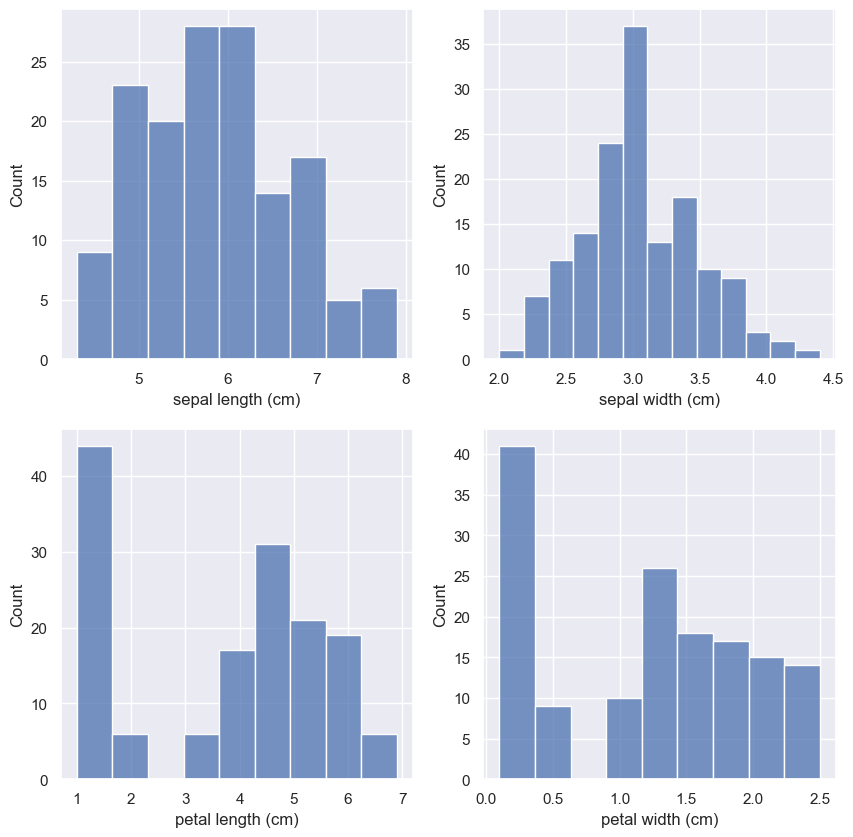

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i in range(0, len(data["feature_names"])):
    col = data["feature_names"][i]
    sns.histplot(data=df, x=col, ax=axs[i])

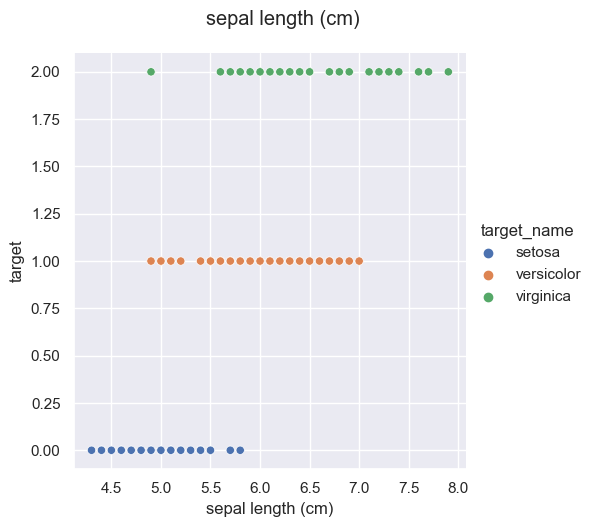

In [18]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.05)

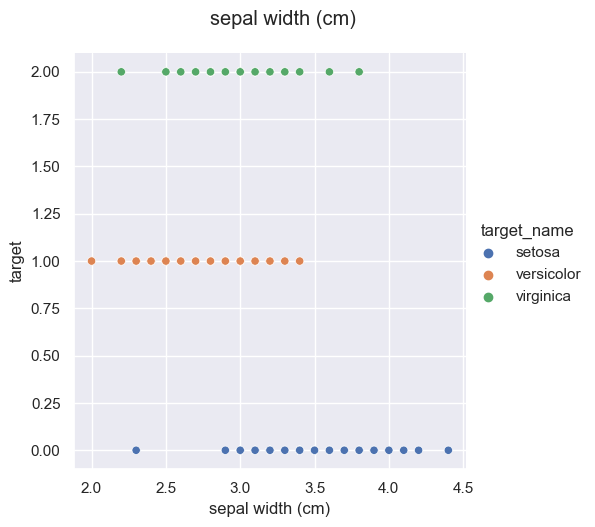

In [19]:
col = "sepal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.05)

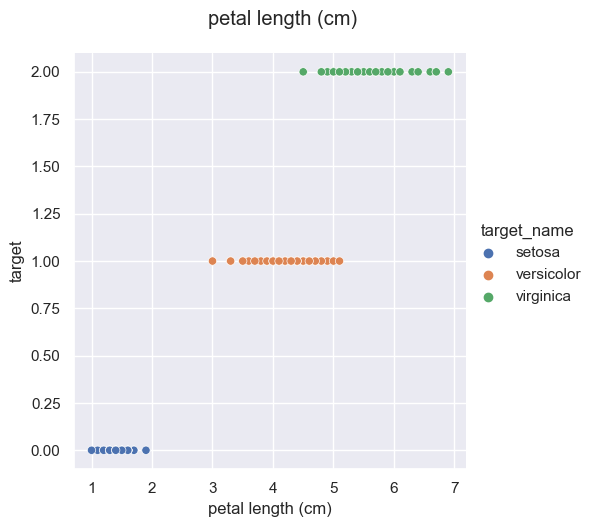

In [20]:
col = "petal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.05)

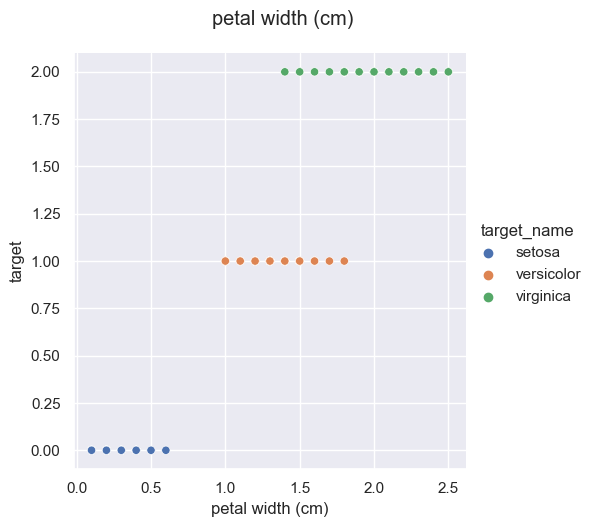

In [21]:
col = "petal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.05)

### Exploratory Data Analysis (EDA) - Pairplots

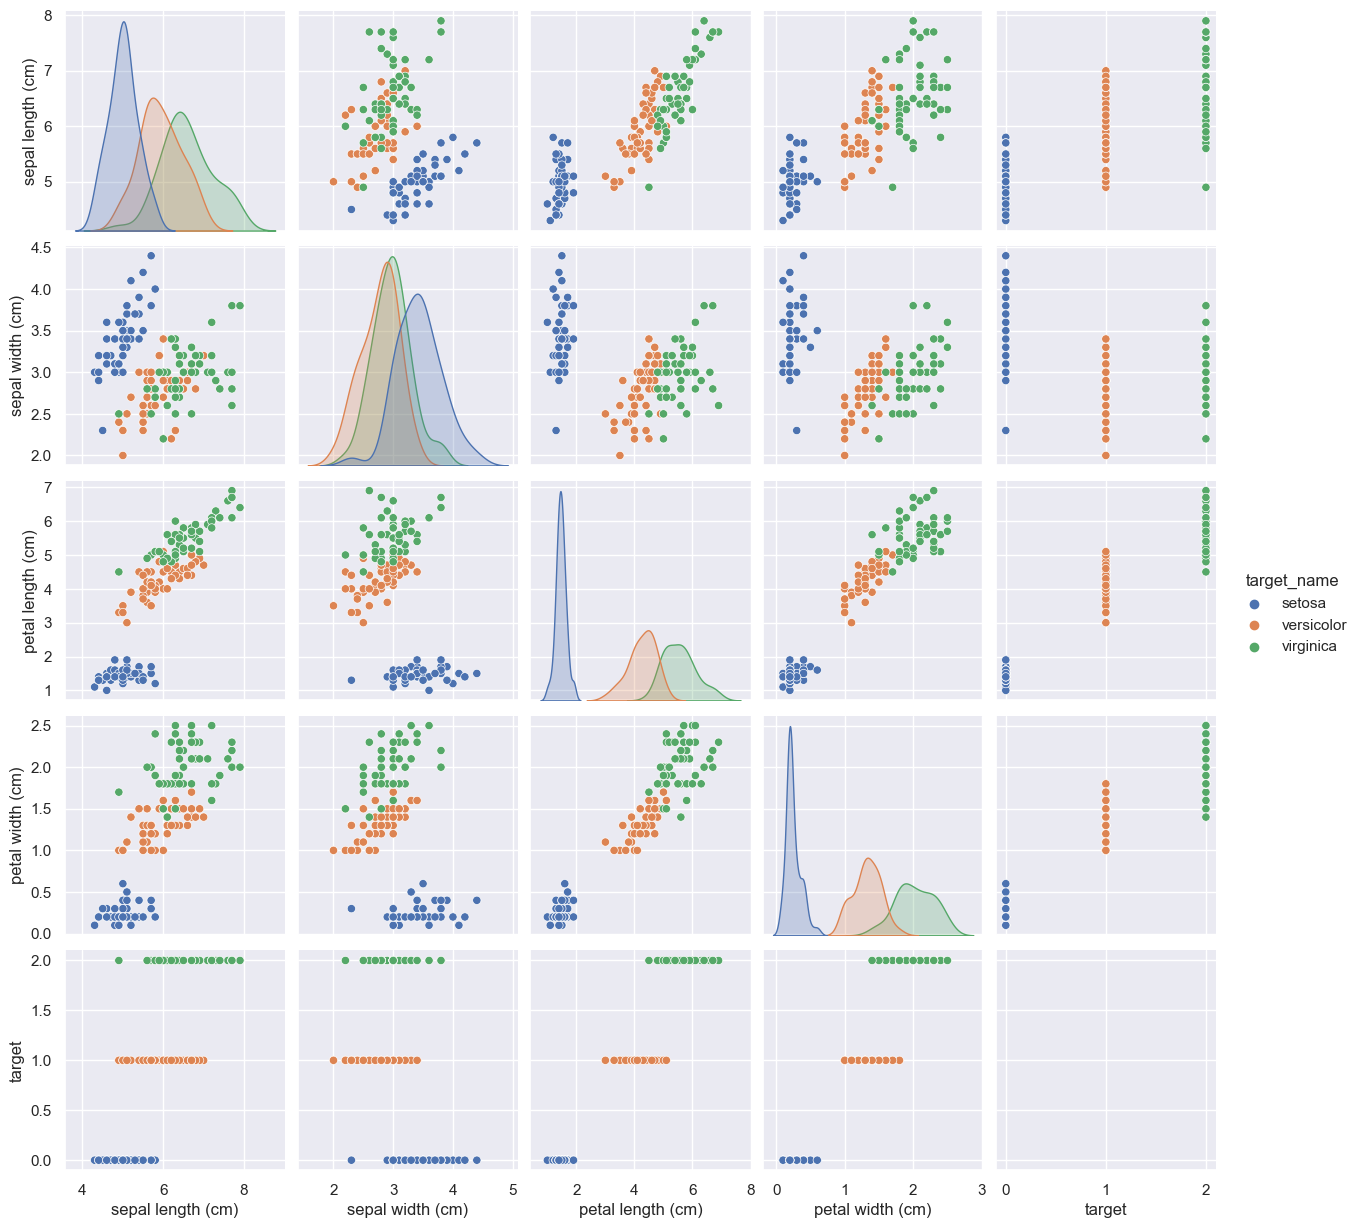

In [22]:
_ = sns.pairplot(df, hue="target_name")

### Train test split

In [23]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [24]:
df_train.shape

(112, 6)

In [25]:
df_test.shape

(38, 6)

In [26]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
88,5.6,3.0,4.1,1.3,1,versicolor
101,5.8,2.7,5.1,1.9,2,virginica
58,6.6,2.9,4.6,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
107,7.3,2.9,6.3,1.8,2,virginica


### Prepare data for modeling

In [27]:
X_train = df_train.drop(columns=["target", "target_name"]).values
y_train = df_train["target"].values

X_test = df_test.drop(columns=["target", "target_name"]).values
y_test = df_test["target"].values

### Modeling

At least beat 33% accuracy

#### Manual modeling

In [29]:
def single_feature_prediction(petal_length):
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2
    
manual_y_prediction = np.array([single_feature_prediction(val) for val in X_train[:, 2]])
manual_model_accuracy = np.mean(manual_y_prediction == y_train)
print(f"Manual model accuracy: {manual_model_accuracy * 100:.2f}%")

Manual model accuracy: 96.43%


#### Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(max_iter=200)

In [32]:
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.25)

In [33]:
_ = model.fit(Xt, yt)

In [34]:
model.score(Xv, yv)

0.9642857142857143

##### Cross Validation

In [35]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [36]:
model = LogisticRegression(max_iter=200)

In [37]:
accuracies = cross_val_score(model, X_train, y_train)

In [38]:
np.mean(accuracies)

0.9549407114624506

#### Finding misclassified points

In [39]:
y_pred = cross_val_predict(model, X_train, y_train)

In [40]:
predicted_correctly_mask = y_pred == y_train
X_train[~predicted_correctly_mask]
df_predictions = df_train.copy()
df_predictions["correct_prediction"] = predicted_correctly_mask
df_predictions["prediction"] = y_pred
df_predictions["prediction_label"] = df_predictions["prediction"].map(dict(zip(range(0, len(data["target_names"])), data["target_names"])))

In [42]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="target_name", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
    plt.show()

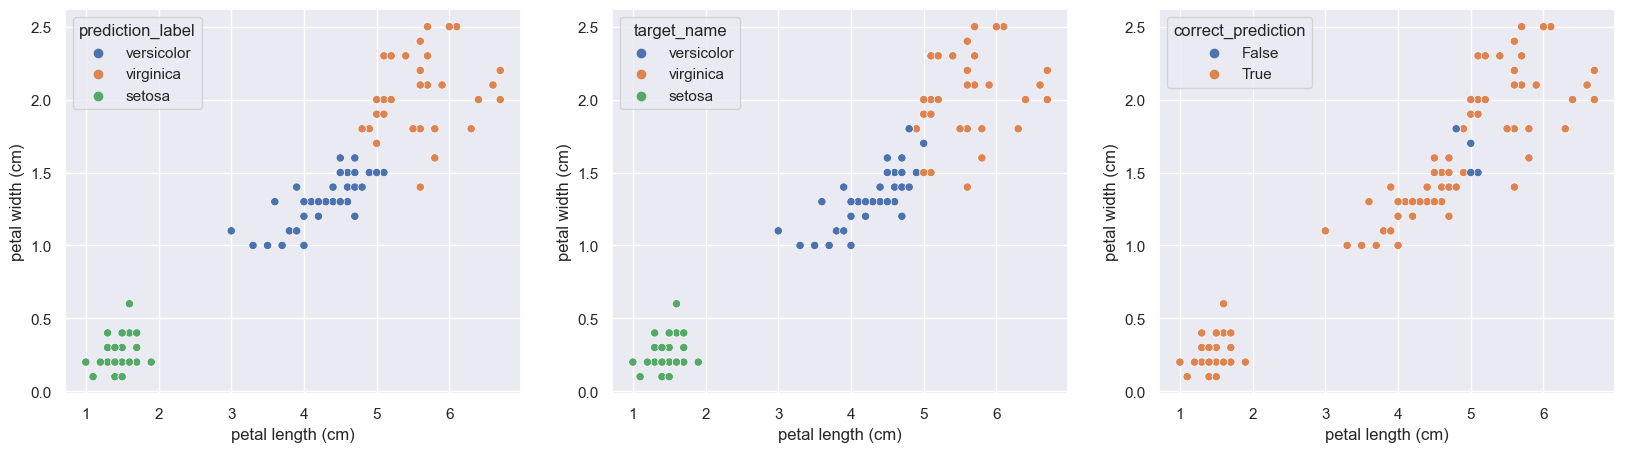

In [43]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

#### Model Tuning

In [44]:
for reg_param in (0.1, 0.3, 0.9, 1, 1.3, 1.7, 1.9, 2, 2.3, 2.9, 3):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, X_train, y_train)
    print(f"Accuracy: {np.mean(accuracies) * 100:.2f}%")


0.1
Accuracy: 93.79%
0.3
Accuracy: 96.40%
0.9
Accuracy: 95.49%
1
Accuracy: 95.49%
1.3
Accuracy: 95.49%
1.7
Accuracy: 95.49%
1.9
Accuracy: 95.49%
2
Accuracy: 95.49%
2.3
Accuracy: 96.40%
2.9
Accuracy: 96.40%
3
Accuracy: 96.40%


### Final Model

In [45]:
model = LogisticRegression(max_iter=200, C=2)

In [46]:
_ = model.fit(X_train, y_train)

In [47]:
y_test_pred = model.predict(X_test)
test_set_correctly_classified = y_test_pred == y_test
print(f"Test set accuracy: {np.mean(test_set_correctly_classified) * 100:.2f}%")

Test set accuracy: 92.11%


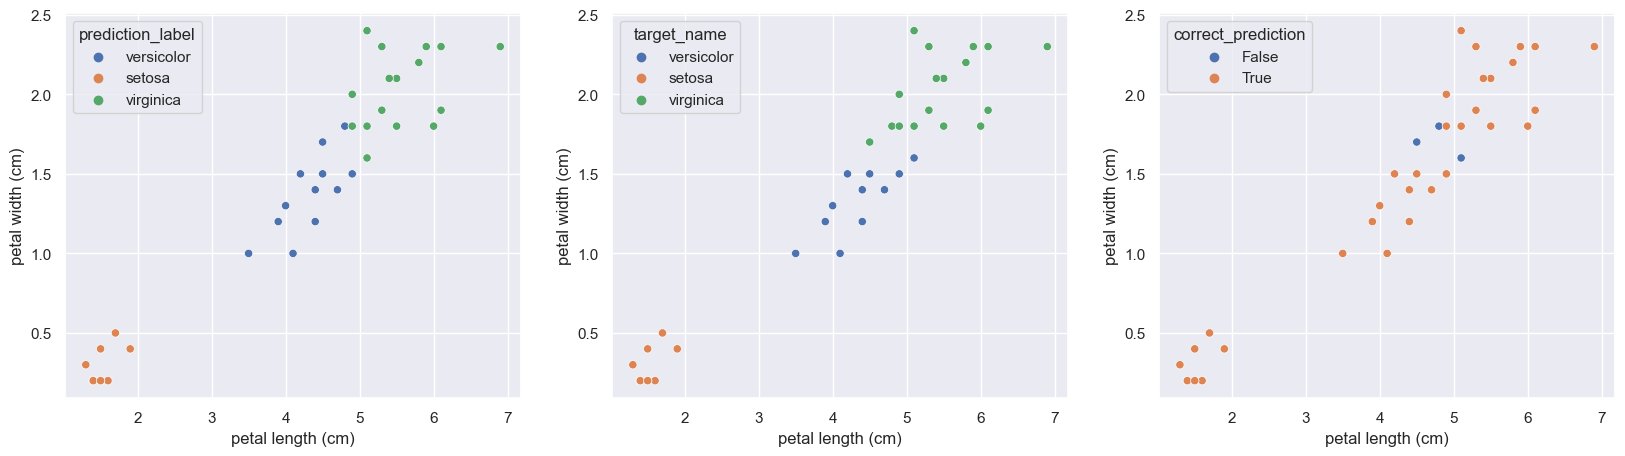

In [48]:
X_test[~test_set_correctly_classified]
df_predictions_test = df_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map(dict(zip(range(0, len(data["target_names"])), data["target_names"])))
plot_incorrect_predictions(df_predictions_test, "petal length (cm)", "petal width (cm)")